### Save any data (e.g. a JPEG image) as text in Google docs

In [1]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

import base64

##### Authentication token

In [2]:
# If modifying these scopes, delete the file token.pickle.
#SCOPES = ['https://www.googleapis.com/auth/documents.readonly']
SCOPES = ['https://www.googleapis.com/auth/documents']

def get_auth():
    """Shows basic usage of the Docs API.
    Prints the title of a sample document.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

In [2]:
with open('token.pickle', 'rb') as token:
    creds = pickle.load(token)

In [3]:
service = build('docs', 'v1', credentials=creds)

##### Read the data you want to save as binary 

In [4]:
with open('sample.jpeg', 'rb') as file:
    data_upload = file.read()

##### Encode the binary as base64 

In [5]:
text_upload = base64.b64encode(data_upload).decode()

##### Let's see a bit of the text 

In [22]:
text_upload[:1000]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBLAGQAMBIgACEQEDEQH/xAAxAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAt2EwNBRLKEFJgigmdJIm5RJgJghgmAAAAA2SUElIKlFkBSQNAAAAKAwpJKcIaYJtKNAAAmCGCYAADTAEMAAABArszrRCJkqQAdmb0ZlVIdZybLFroKgGAMJbZBQIAQwAQ3lJuYhsYBrMA0CAAldEVbXKdgxfRRhpcFLKTaIBiAAQAAAAAAAAAAG1ksIKSIAAAAAAAAAAAGhWIGAAADAAAAEwSpCGImMTBUMIKEgsJLkQIEIAQ2gdQGhmGky0RQSUEghgAADQMQAACBiYJoYgbQMABAxAwAABoUAAAAEAQwAAUAGIAAAAAAGJoGIGIGhiWtGOtipjAclEZm84hpMspoKcSaLMABE2CAATAAKVDbajAbxzOmecNZkQGAANAAACYCYCBhRLpkPQWHSASGpAQIAAAAAAAAAAAAAMQMQMQNyDci0kDaBoABiGAMENCMxNDNGizC1IUIG5DQiwVszNZICCyBLlMQwEwQADBAAAAMSsJGhADAAAAAAAAAAaYJoYgYmCYIYAANA0AA1S1s53rmIAYmIvQyrRA0KwBkoucpNIGiYAIAATEMGAAACYA0DTog2oy0Ml2zyEEwABiBiBiYNMAAAEME3RNNq3MmhkjRZoskGJgOiSgVSi1mFJCAAAAAAAAAmAACYJjENk02slhBaJVITGAAAGJSSVUoAAAA

##### Now create a google doc and note the document ID

In [6]:
body = {
    'title': 'sample.jpeg'
}
doc = service.documents().create(body=body).execute()

In [7]:
DOCUMENT_ID = doc['documentId']

##### Place the text in the document in a single paragraph

In [8]:
requests = [
     {
        'insertText': {
            'location': {
                'index':1,
            },
            'text': text_upload
        }
    }
]

In [9]:
result = service.documents().batchUpdate(documentId=DOCUMENT_ID, body={'requests': requests}).execute()

##### Donload the document

In [10]:
document = service.documents().get(documentId=DOCUMENT_ID).execute()

##### Extract the text from the paragraph

In [11]:
text_download = document.get('body').get('content')[1].get('paragraph').get('elements')[0].get('textRun').get('content')

In [12]:
len(text_upload)

230512

In [13]:
len(text_download)

230513

In [14]:
text_download[-1]

'\n'

In [15]:
text_download=text_download[:-1] # remove the trailing new line 

##### Get the binary content by decoding base64

In [16]:
data_download = base64.b64decode(text_download.encode())

##### Write to a file

In [17]:
with open('sample_download.jpeg', 'wb') as file:
    file.write(data_download)
    file.close()

###### Compare both files

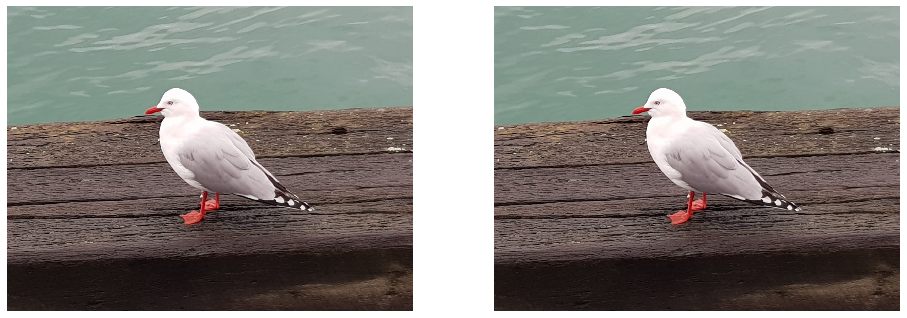

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = plt.imread('sample.jpeg')
sample_download = plt.imread('sample_download.jpeg')

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(sample)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_download)
plt.axis('off')
plt.show()

In [20]:
import numpy as np
np.array_equal(sample, sample_download)

True